# Music Analysis
In this python notebook, we now perform some analysis on the data collected to understand and iterpret in better and look out for the outliers

In [3]:
loc='G:\\Projects\\Music-Popularity-Predicition\\'
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import time
import seaborn as sns

import matplotlib as mt
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier


pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
df=pd.read_csv(loc+'\\DataMining\\SongsData.csv')
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
cols=df.columns.tolist()

In [6]:
cols=['id','uri','url','duration_ms','name','tempo','explict','energy', 'danceability','acousticness',
      'instrumentalness','liveness','loudness','popularity','speechiness','valence','Hit']

In [7]:
df=df[cols]

In [8]:
df.replace(to_replace =["y", "n"],value = [1,0],inplace=True)  
df.replace(to_replace = ["True","False"], value=[1,0] , inplace=True)

In [9]:
df.head()

id                                   uri                                                url  duration_ms                                               name    tempo  explict  energy  danceability  acousticness  instrumentalness  liveness  loudness  popularity  speechiness  valence  Hit
0  3E7dfMvvCLUddWissuqMwr  spotify:track:3E7dfMvvCLUddWissuqMwr  https://open.spotify.com/track/3E7dfMvvCLUddWi...       202066                                Party In The U.S.A.   96.021    False   0.698         0.652       0.00112          0.000115    0.0886    -4.667          80       0.0420    0.470    0
1  7JJmb5XwzOO8jgpou264Ml  spotify:track:7JJmb5XwzOO8jgpou264Ml  https://open.spotify.com/track/7JJmb5XwzOO8jgp...       199440                    There's Nothing Holdin' Me Back  121.998    False   0.813         0.866       0.38000          0.000000    0.0779    -4.063          84       0.0554    0.969    1
2  51MMC5DogGZAnHil5HQAXg  spotify:track:51MMC5DogGZAnHil5HQAXg  https://open.spotify.com/track/51MMC5DogGZAnHi...       215280                                            Circles  120.042    False   0.762         0.695       0.19200          0.002440    0.0863    -3.497          81       0.0395    0.553    0
3  2TIlqbIneP0ZY1O0EzYLlc  spotify:track:2TIlqbIneP0ZY1O0EzYLlc  https://open.spotify.com/track/2TIlqbIneP0ZY1O...       182160                                  Someone You Loved  109.891    False   0.405         0.501       0.75100          0.000000    0.1050    -5.679          88       0.0319    0.446    0
4  4Yq3XUNfWrAPWuB94qkC09  spotify:track:4Yq3XUNfWrAPWuB94qkC09  https://open.spotify.com/track/4Yq3XUNfWrAPWuB...       229573  Take What You Want (feat. Ozzy Osbourne & Trav...  139.919    False   0.800         0.499       0.09060          0.000000    0.1470    -2.665          78       0.0502    0.272    0

# Feature Importance

In [10]:
df.drop(['id','uri','url','name','explict'],axis=1,inplace=True)

In [11]:
df.head()

duration_ms    tempo  energy  danceability  acousticness  instrumentalness  liveness  loudness  popularity  speechiness  valence  Hit
0       202066   96.021   0.698         0.652       0.00112          0.000115    0.0886    -4.667          80       0.0420    0.470    0
1       199440  121.998   0.813         0.866       0.38000          0.000000    0.0779    -4.063          84       0.0554    0.969    1
2       215280  120.042   0.762         0.695       0.19200          0.002440    0.0863    -3.497          81       0.0395    0.553    0
3       182160  109.891   0.405         0.501       0.75100          0.000000    0.1050    -5.679          88       0.0319    0.446    0
4       229573  139.919   0.800         0.499       0.09060          0.000000    0.1470    -2.665          78       0.0502    0.272    0

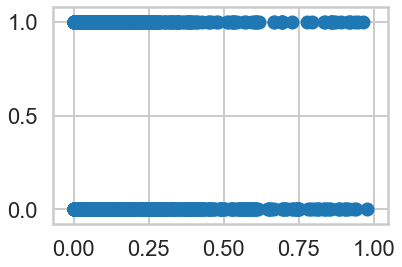

In [10]:
plt.scatter(df.acousticness,df.Hit)

In [11]:
X=df
y=df.Hit
X.drop('Hit', axis=1, inplace=True)

In [12]:
model = ExtraTreesClassifier()
model.fit(X,y)
# display the relative importance of each attribute
print(model.feature_importances_)

C:\Users\munis_000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11977224 0.09553233 0.08921223 0.09424116 0.0973949  0.07001344
 0.08709837 0.08375063 0.07645104 0.09249377 0.09403988]


In [13]:
df.head()

duration_ms    tempo  energy  danceability  acousticness  instrumentalness  liveness  loudness  popularity  speechiness  valence
0       202066   96.021   0.698         0.652       0.00112          0.000115    0.0886    -4.667          80       0.0420    0.470
1       199440  121.998   0.813         0.866       0.38000          0.000000    0.0779    -4.063          84       0.0554    0.969
2       215280  120.042   0.762         0.695       0.19200          0.002440    0.0863    -3.497          81       0.0395    0.553
3       182160  109.891   0.405         0.501       0.75100          0.000000    0.1050    -5.679          88       0.0319    0.446
4       229573  139.919   0.800         0.499       0.09060          0.000000    0.1470    -2.665          78       0.0502    0.272

In [14]:
x=model.feature_importances_.tolist()

In [15]:
objects = X.columns.tolist()

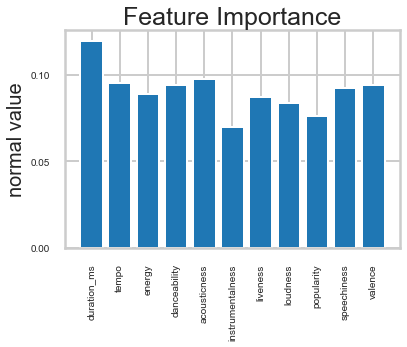

In [16]:
y_pos = np.arange(len(objects))

plt.bar(y_pos, x, align='center')
plt.yticks(fontsize=10)
plt.xticks(y_pos, objects,rotation=90,fontsize=10)
plt.ylabel('normal value',fontsize=20)
plt.title('Feature Importance',fontsize=25)

plt.show()

## Tempo

In [32]:
#finding mean median mode of various features
import statistics as st
st.median(temp)

120.05

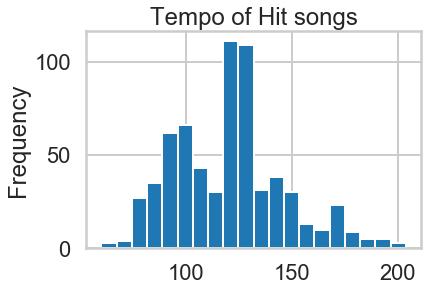

In [25]:
temp=[]
for i in range(len(y)):
    if y[i]==1:
        temp.append(df.tempo[i])
    else:
        continue
t=np.asarray(temp)
plt.hist(t,bins=20)
plt.ylabel("Frequency")
plt.title("Tempo of Hit songs")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000002ABB8F710>,
      dtype=object)

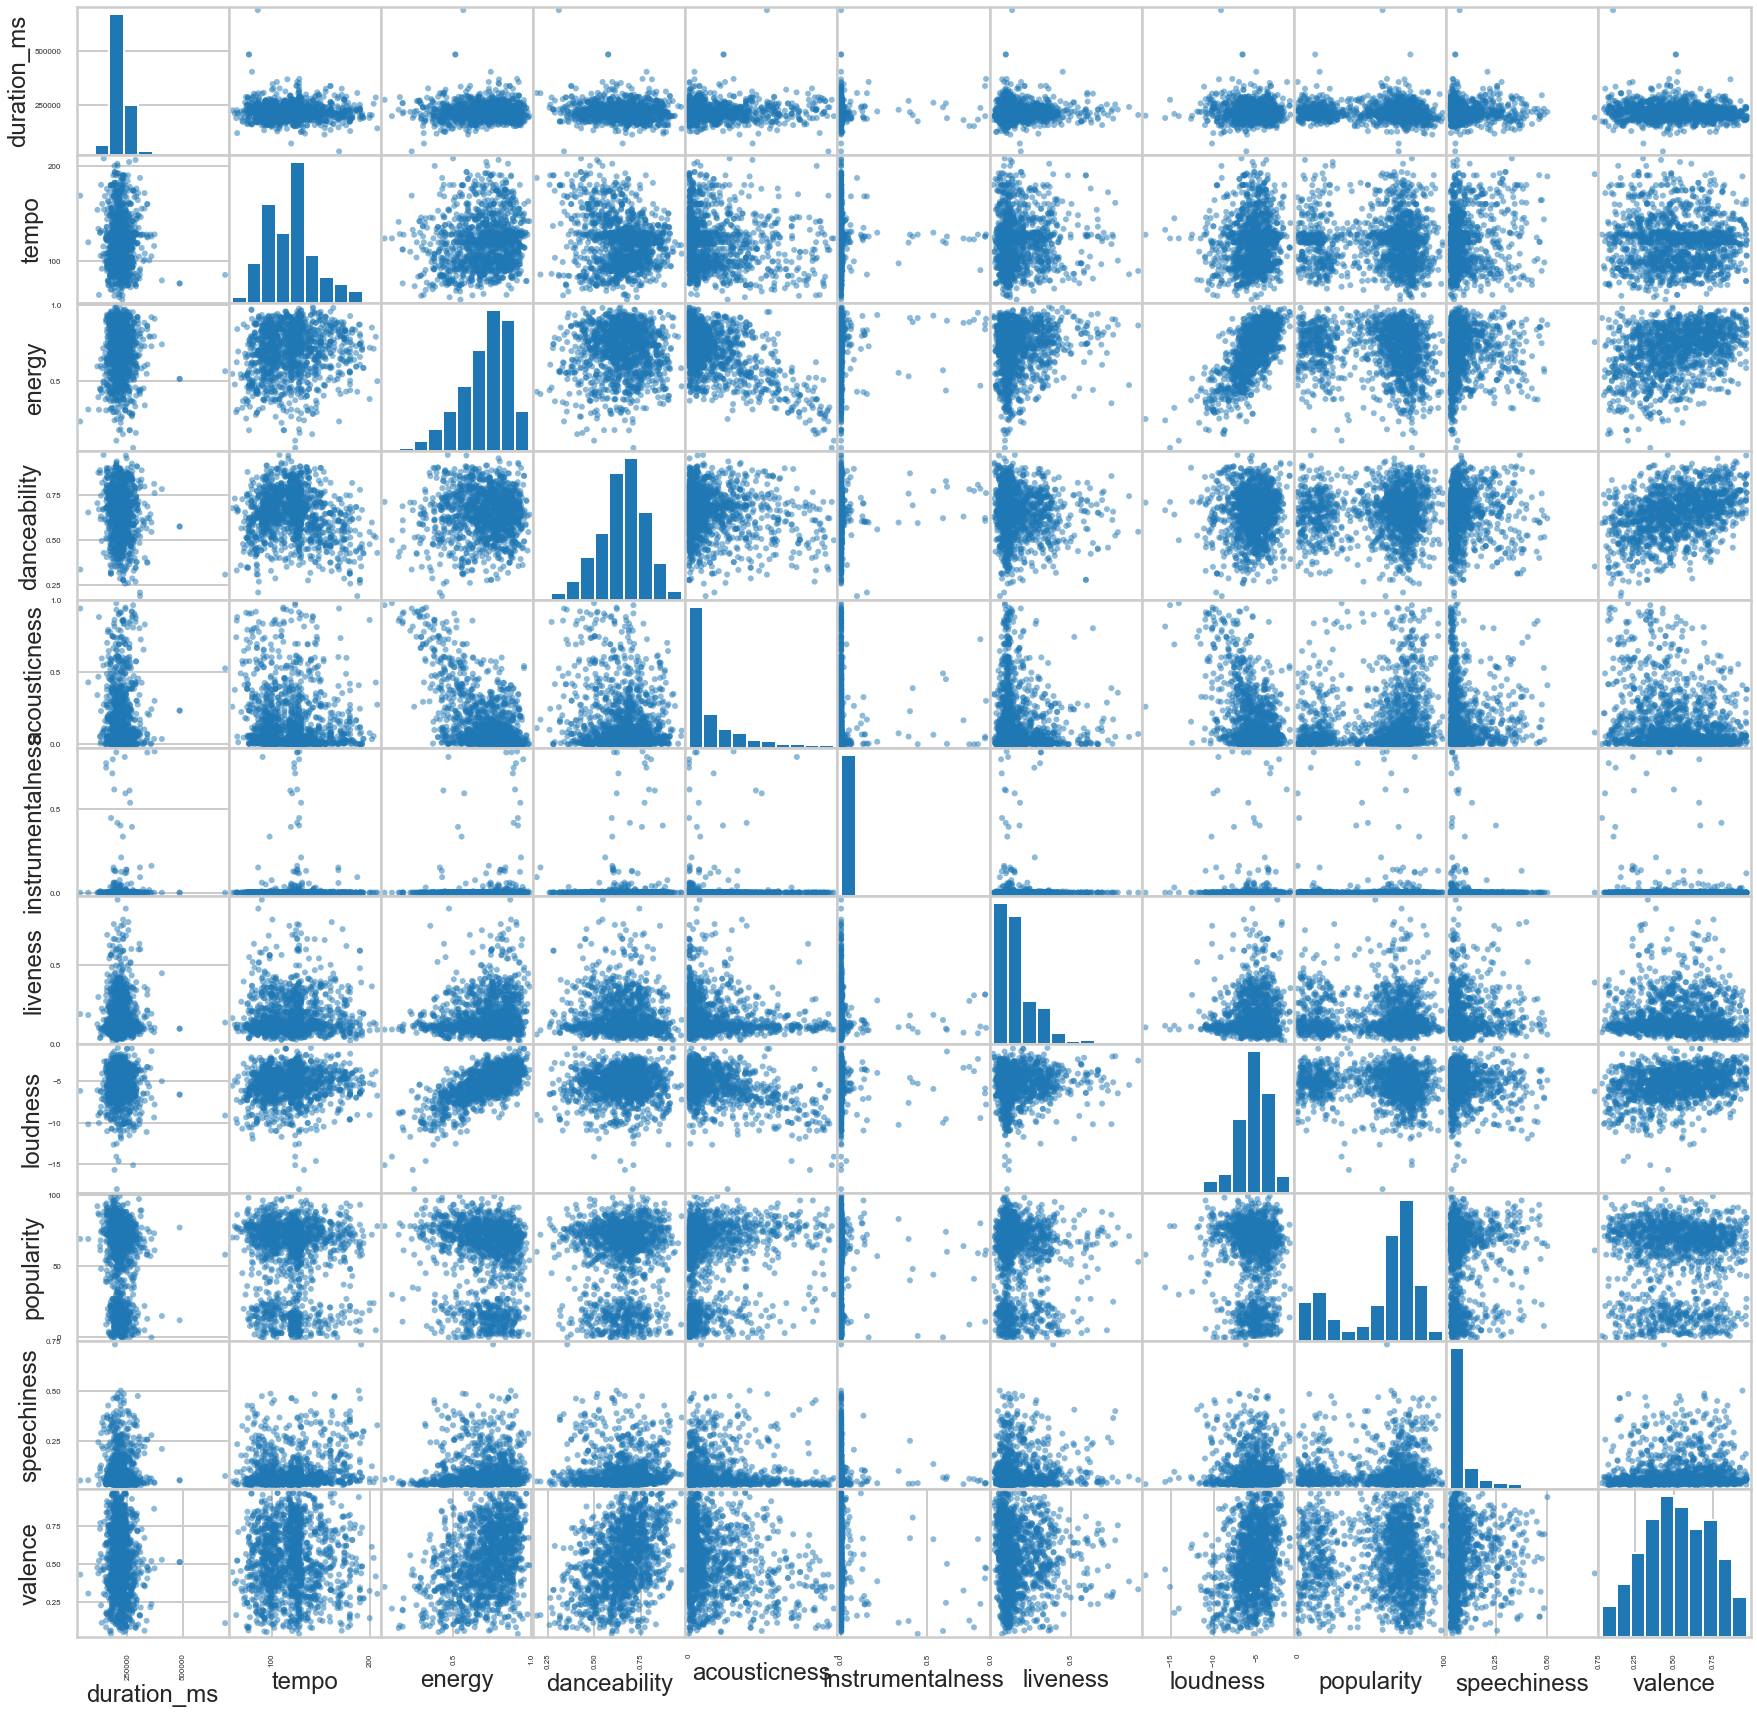

In [43]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['duration_ms','tempo','energy', 'danceability','acousticness',
                   'instrumentalness','liveness','loudness','popularity','speechiness','valence']], figsize=(30,30))

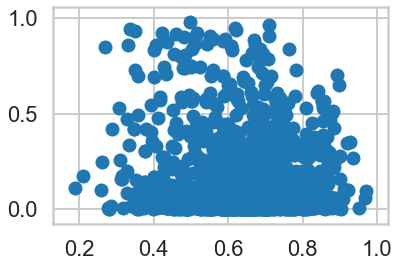

In [12]:
plt.scatter(df.danceability, df.acousticness)

In [13]:
artist=pd.read_csv(loc+'\\DataMining\\ArtistData.csv')

In [28]:
artist.genres[0][3]

'a'

In [24]:
len(genresList[0])

37